**Data Visualization Project 2024**

Hello, I am **Aman Yadav**, currently a student enrolled in the LSI-II program at the esteemed Technical Institute of Deggendorf, bearing the matriculation number **22305265**. This HTML document serves as a comprehensive presentation of my student project for Semester II of the year 2024, which is centered around the Data Visualization course. Within this project, you will find a diverse array of plots, each meticulously crafted and accompanied by the corresponding Python code. Additionally, I have provided explanations to enhance the understanding of each plot. The data utilized throughout this project, encompassing various stages such as processing, filtering, and plotting, has been graciously supplied by our university lecturer. This project aims to showcase not only the technical skills I have acquired but also the application of data visualization techniques in practical scenarios

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches
import time

**1. Visualization Exercise 1**

**Loading the data sheet into machine. I used pandas for loadting the CSV file.**

In [8]:
datasheet_annotations = pd.read_csv("10_project_data_annotation.csv")
datasheet_signal = pd.read_csv("10_project_data_signals.csv")
datasheet_annotations['gene_position'] = datasheet_annotations.apply(lambda row: [row['start'], row['stop']], axis=1)




In [9]:
datasheet_signal

,P1,P2,P3,P4
0,0.28,0.14,0.19,0.19
1,0.30,0.16,0.17,0.20
2,0.26,0.13,0.20,0.12
3,0.21,0.13,0.25,0.15
4,0.31,0.03,0.24,0.20
...,...,...,...,...
19995,0.27,0.13,0.27,0.13
19996,0.24,0.16,0.20,0.09
19997,0.23,0.19,0.18,0.14
19998,0.25,0.10,0.17,0.09


In [10]:
datasheet_annotations


,name,type,start,stop,strand,gene_position
0,geneA,transcript,2000,7764,+,"[2000, 7764]"
1,geneA,exon,2700,5100,+,"[2700, 5100]"
2,geneA,exon,6000,6800,+,"[6000, 6800]"
3,geneB,transcript,9000,12720,-,"[9000, 12720]"
4,geneB,exon,9900,10100,-,"[9900, 10100]"
5,geneB,exon,11000,11500,-,"[11000, 11500]"
6,geneB,exon,11900,12450,-,"[11900, 12450]"
7,geneC,transcript,14850,18000,+,"[14850, 18000]"
8,geneC,exon,15700,17090,+,"[15700, 17090]"


After reviewing the visualized graph, I concluded that the annotation range is calculated as the interval between the highest start position and the highest stop position for each gene transcript . The genes are classified into two strands, **'+'** and **'-'**. Therefore, I separated the data by strands.

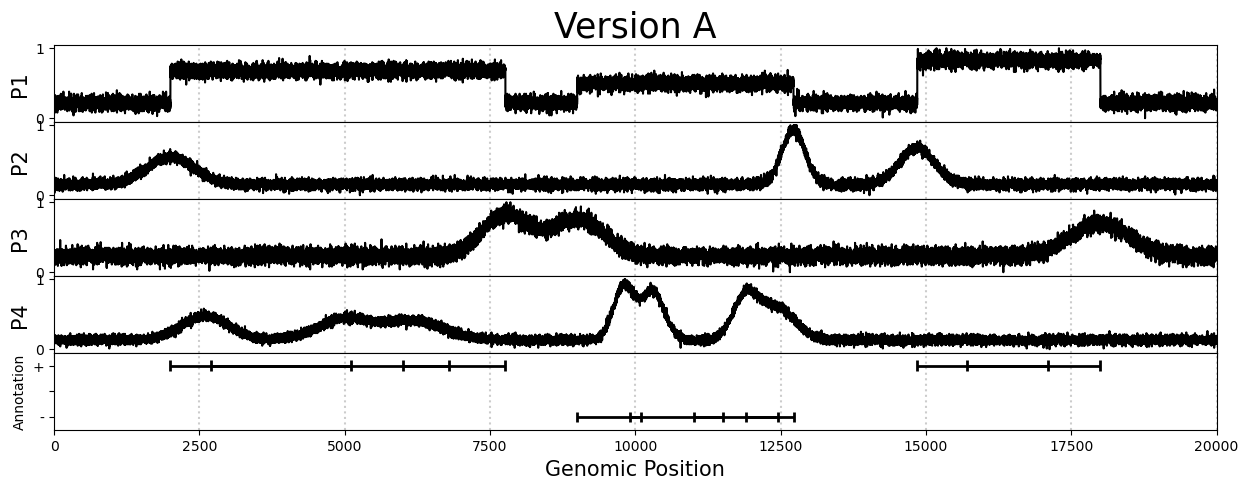

In [11]:

x = np.arange(20000) # **<- This will be my common x axis for all the plots. In the given plot it is upto 20000.** 


# sepreted the strand for + and -
strand_counts_plus = datasheet_annotations[datasheet_annotations["strand"] == "+"]
strand_counts_neg = datasheet_annotations[datasheet_annotations["strand"] == "-"]

#I used subplot for making 5 diffrent plots in one row. 
# After reserching the matplotlib cheat sheet, I came across "sharex" argument which allow us to put one common x axis for all the plots. 

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(15, 5))


# I plotted all the values of "P" one after another using the subplot indexing.
# I also made sure that the fnst size is good .

axes[0].plot(x, datasheet_signal["P1"], color='black')
axes[0].set_ylabel('P1', fontsize = 15)
axes[0].set_title("Version A", fontsize = 25) # I have to put the plot title here to display it on the top of all plots

axes[1].plot(x, datasheet_signal["P2"], color='black')
axes[1].set_ylabel('P2' , fontsize = 15)

axes[2].plot(x, datasheet_signal["P3"], color='black')
axes[2].set_ylabel('P3', fontsize = 15)

axes[3].plot(x, datasheet_signal["P4"], color='black')
axes[3].set_ylabel('P4', fontsize = 15)


# Here I set the x and y aesthetic according to the requirements.

axes[4].set_xlim(0, 20000)
axes[4].set_ylim(-1.5, 1.5)
axes[4].set_yticks([-1, 0, 1])
axes[4].set_yticklabels(['-', ' ', '+'])


###############################################################################################################################


# from here on I seprated the positive and negative strands for the plot.
# plotting for ositive strand annotations
#  annotation Classification into plus and "minus"'''
plus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "+"].iterrows()]
minus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "-"].iterrows()]



# plotting for ositive strand annotations
for start, end in plus_annotations:
    axes[4].plot([start, end], [1, 1], color='black', lw=2, solid_capstyle='butt')
    axes[4].plot([start, start], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')  # Aesthetic end of the line
    axes[4].plot([end, end], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')  

# Plotting "-" strand annotations 
for start, end in minus_annotations:
    axes[4].plot([start, end], [-1, -1], color='black', lw=2, solid_capstyle='butt')
    axes[4].plot([start, start], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')  # Aesthetic end of theline
    axes[4].plot([end, end], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt') 
    
##########################################################################################################################


x_axis_values = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000] # I made the list of numbers where I want make my grid lines
for value in x_axis_values:
    axes[4].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    axes[1].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    axes[2].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    axes[3].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    axes[0].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    
axes[4].set_ylabel('Annotation', fontsize = 10)
axes[4].set_xlabel('Genomic Position' , fontsize = 15)

# Adjust layout
plt.subplots_adjust(hspace=0.0)


plt.show()



**Pros - The Version A plot shows multiple datas in one plot but properley seprated, The annotation plot in the end give even more indications of the genomic regions. The use of grayscale with clear black lines for the plots and annotations ensures that the data is easily distinguishable without color distractions. 

cons - There are no legends provided to explain the plots. While the y-axis labels provide some context, additional information might be necessary for a complete understanding. for simplicity I considered the range of genes.  There is no clear information about P1 - P4 due to lack of labels.**

C:\Users\Aman Yadav\AppData\Local\Temp\ipykernel_28464\245017017.py:64: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0)


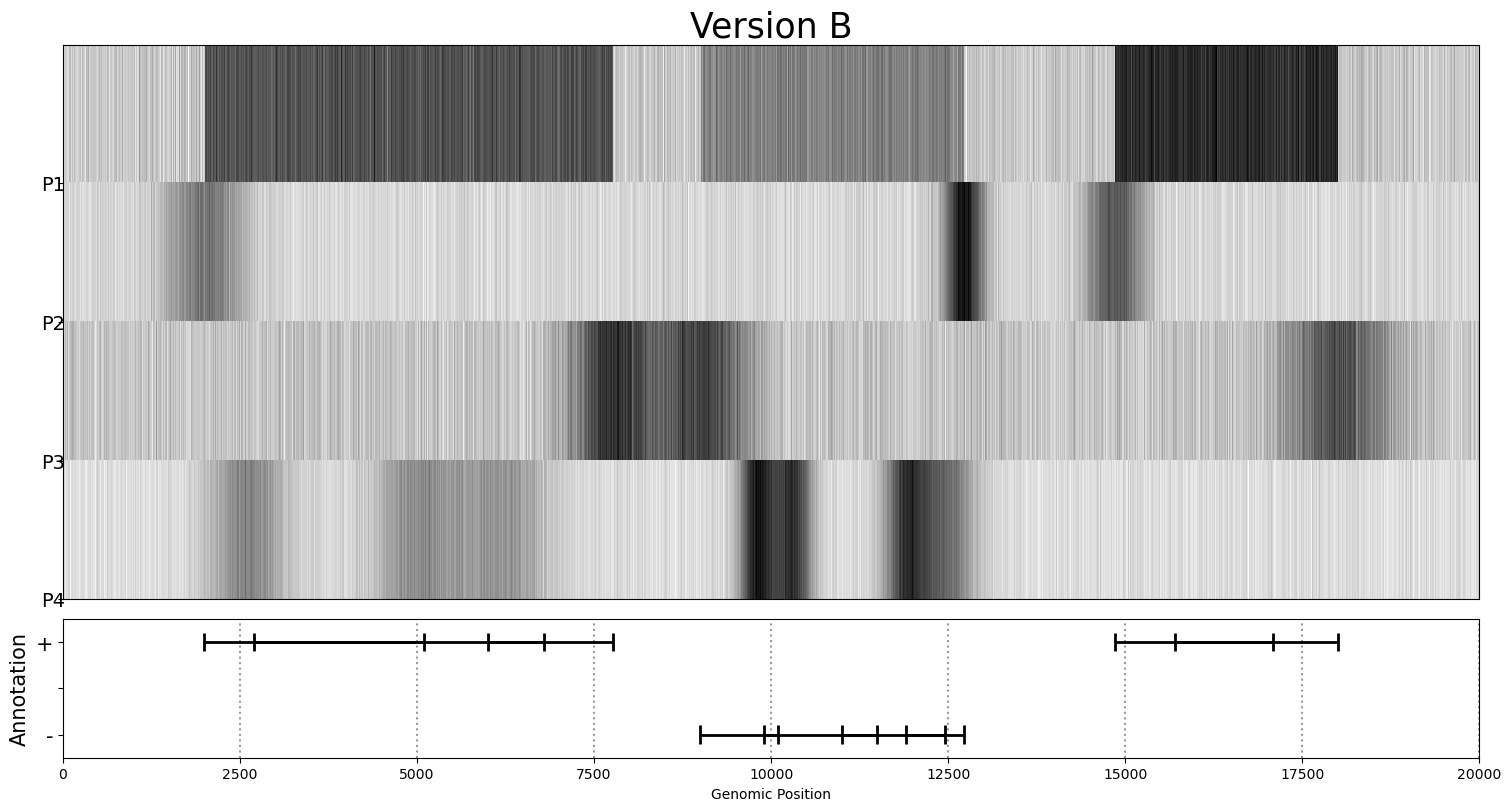

In [12]:
heatmap_data = {"P1": datasheet_signal["P1"].values.reshape(1, -1),"P2": datasheet_signal["P2"].values.reshape(1, -1),
    "P3": datasheet_signal["P3"].values.reshape(1, -1),"P4": datasheet_signal["P4"].values.reshape(1, -1)}

###############################################################################################################################

combined_heatmap_data = np.vstack(list(heatmap_data.values())) # Combined all heatmap data vertically


fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15, 8)

gs = fig.add_gridspec(2, 1, height_ratios=[4, 1])

# combined heatmaps
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1]) 


###############################################################################################################################

im = ax1.imshow(combined_heatmap_data, aspect='auto', cmap='gray_r', interpolation='none')
ax1.set_yticks([0.5 + i for i in range(len(heatmap_data))])
ax1.set_yticklabels([f'P{i+1}' for i in range(len(heatmap_data))] ,ha='center',  fontsize = 14)
ax1.set_xticks([])
ax1.yaxis.set_label_coords(1, 5)
ax1.set_title("Version B" , fontsize = 25)

###############################################################################################################################

#  annotations 

ax2.set_xlim(0, 20000)
ax2.set_ylim(-1.5, 1.5)
ax2.set_yticks([-1, 0, 1])
ax2.set_yticklabels(['-', ' ', '+'] , fontsize = 15)


plus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "+"].iterrows()]
minus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "-"].iterrows()]


for start, end in plus_annotations:
    ax2.plot([start, end], [1, 1], color='black', lw=2, solid_capstyle='butt')
    
    ax2.plot([start, start], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')  # to put Aesthetic for the end of the line "|---|"
    ax2.plot([end, end], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt') 

# Plotting "-" strand annotations
for start, end in minus_annotations:
    ax2.plot([start, end], [-1, -1], color='black', lw=2, solid_capstyle='butt')
    ax2.plot([start, start], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')  # to put  Aesthetic for the end of the line "|---|"
    ax2.plot([end, end], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')


x_axis_values = [2500 , 5000, 7500 , 10000, 12500 , 15000 , 17500 , 20000]
for values in x_axis_values:
    ax2.axvline(x = values , color='black', linestyle='dotted' , alpha = 0.4)
###############################################################################################################################

ax2.set_ylabel('Annotation', fontsize = 15)
ax2.set_xlabel('Genomic Position')

# To join the plots together.
plt.subplots_adjust(hspace=0)


plt.show()

**Pros - I noticed how version B puts everything in one plot, saving space and making it easy to compare the heatmap data and annotations directly. The grayscale heatmap for P1 to P4 shows patterns and trends across genomic positions really clearly. The vertical dotted lines for specific genomic spots (like 2500, 5000, etc.) help line up and compare data across different areas.

Cons - But, I believe the grayscale heatmap could use more contrast. It might be tough for folks with vision issues to see the subtle differences. Adding some color could make things clearer. Additionally, the heatmap seems to present data in ranges rather than precise values, which could be misleading.**






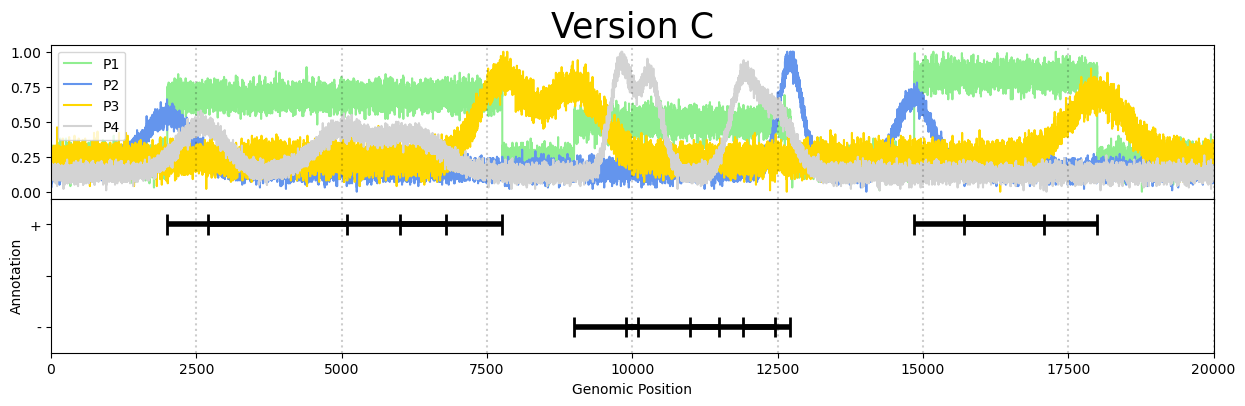

In [13]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4), gridspec_kw={'height_ratios': [0.2, 0.2]})
x =   np.arange(20000)
axes[0].plot(x,datasheet_signal["P1"] , color='lightgreen', label = "P1")
axes[0].plot(x,datasheet_signal["P2"] , color='cornflowerblue', label = "P2")
axes[0].plot(x,datasheet_signal["P3"] , color='gold', label = "P3")
axes[0].plot(x,datasheet_signal["P4"] , color='lightgrey', label = "P4")
axes[0].legend(loc = "upper left")
axes[0].set_title("Version C", fontsize = 25)

###############################################################################################################################

axes[1].set_xlim(0, 20000)
axes[1].set_ylim(-1.5, 1.5)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_yticklabels(['-', ' ', '+'])


#  + strand annotations
plus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "+"].iterrows()]
minus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "-"].iterrows()]
for start, end in plus_annotations:
    axes[1].plot([start, end], [1, 1], color='black', lw=4, solid_capstyle='butt')
    axes[1].plot([start, start], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')
    axes[1].plot([end, end], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')

#  negative strand annotations

for start, end in minus_annotations:
    axes[1].plot([start, end], [-1, -1], color='black', lw=4, solid_capstyle='butt')
    axes[1].plot([start, start], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')
    axes[1].plot([end, end], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')
axes[1].set_ylabel('Annotation')
axes[1].set_xlabel('Genomic Position')

###############################################################################################################################
# Asthetics. I slected the data manually to put the vertical line using "axvline"


x_axis_values = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
for value in x_axis_values:
    axes[1].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
    axes[0].axvline(x=value, color='black', linestyle='dotted', alpha=0.2)
###############################################################################################################################
plt.subplots_adjust(hspace=0.0)

plt.show()

**pros - The Version C plot uses different colors for each dataset (P1 to P4), which helps me quickly see the differences between them, and there's a clear legend to match colors to datasets. The annotations below are easy to understand with separate bars, showing me where things are on the genome. The x-axis stays consistent across all datasets and annotations, making it simple for me to line up and compare everything. Plus, those vertical dotted lines really help me see how things line up across the board.

cons -The main plot lines overlap, which can make it hard to pick out individual patterns, especially in dense areas, obscuring some details in the data.Placing the legend inside the plot area might hide some data points; putting it outside could improve visibility.
The vertical grid lines are faint, which could make them hard to see, especially against lighter colors; increasing their opacity or thickness could improve visibility.**







**2. Visualization Exercise 2**

In [14]:
datasheet_scatter = pd.read_csv("10_project_data_scatter.csv")
datasheet_scatter

,x1,x2
0,8.41,5.43
1,9.56,3.92
2,10.83,1.80
3,11.14,2.32
4,11.41,1.41
...,...,...
1995,8.76,1.49
1996,9.89,4.09
1997,10.60,4.36
1998,10.83,2.96


In [15]:
datasheet_bar = pd.read_csv("10_project_data_barplot.csv")

# simillar like mutate in R. I just changed the actual value with "->" in between to match it with the given plot 
# this approach will be diffrent for bigger data sheets. We can use loops in that case 
'''map() takes two arguments: (the coloumn of intrest in the main dataset, 
more sequences (like lists, tuples, or pandas Series) that we want to apply the function to.) '''
mapping = {
    'XY': 'X->Y',
    'XZ': 'X->Z',
    'YX': 'Y->X',
    'YZ': 'Y->Z'
}
datasheet_bar['Unnamed: 0'] = datasheet_bar['Unnamed: 0'].map(mapping)
datasheet_bar

,Unnamed: 0,condition_a_sample_1,condition_a_sample_2,control
0,X->Y,756,619,689
1,X->Z,2411,2189,782
2,Y->X,577,821,689
3,Y->Z,743,781,719


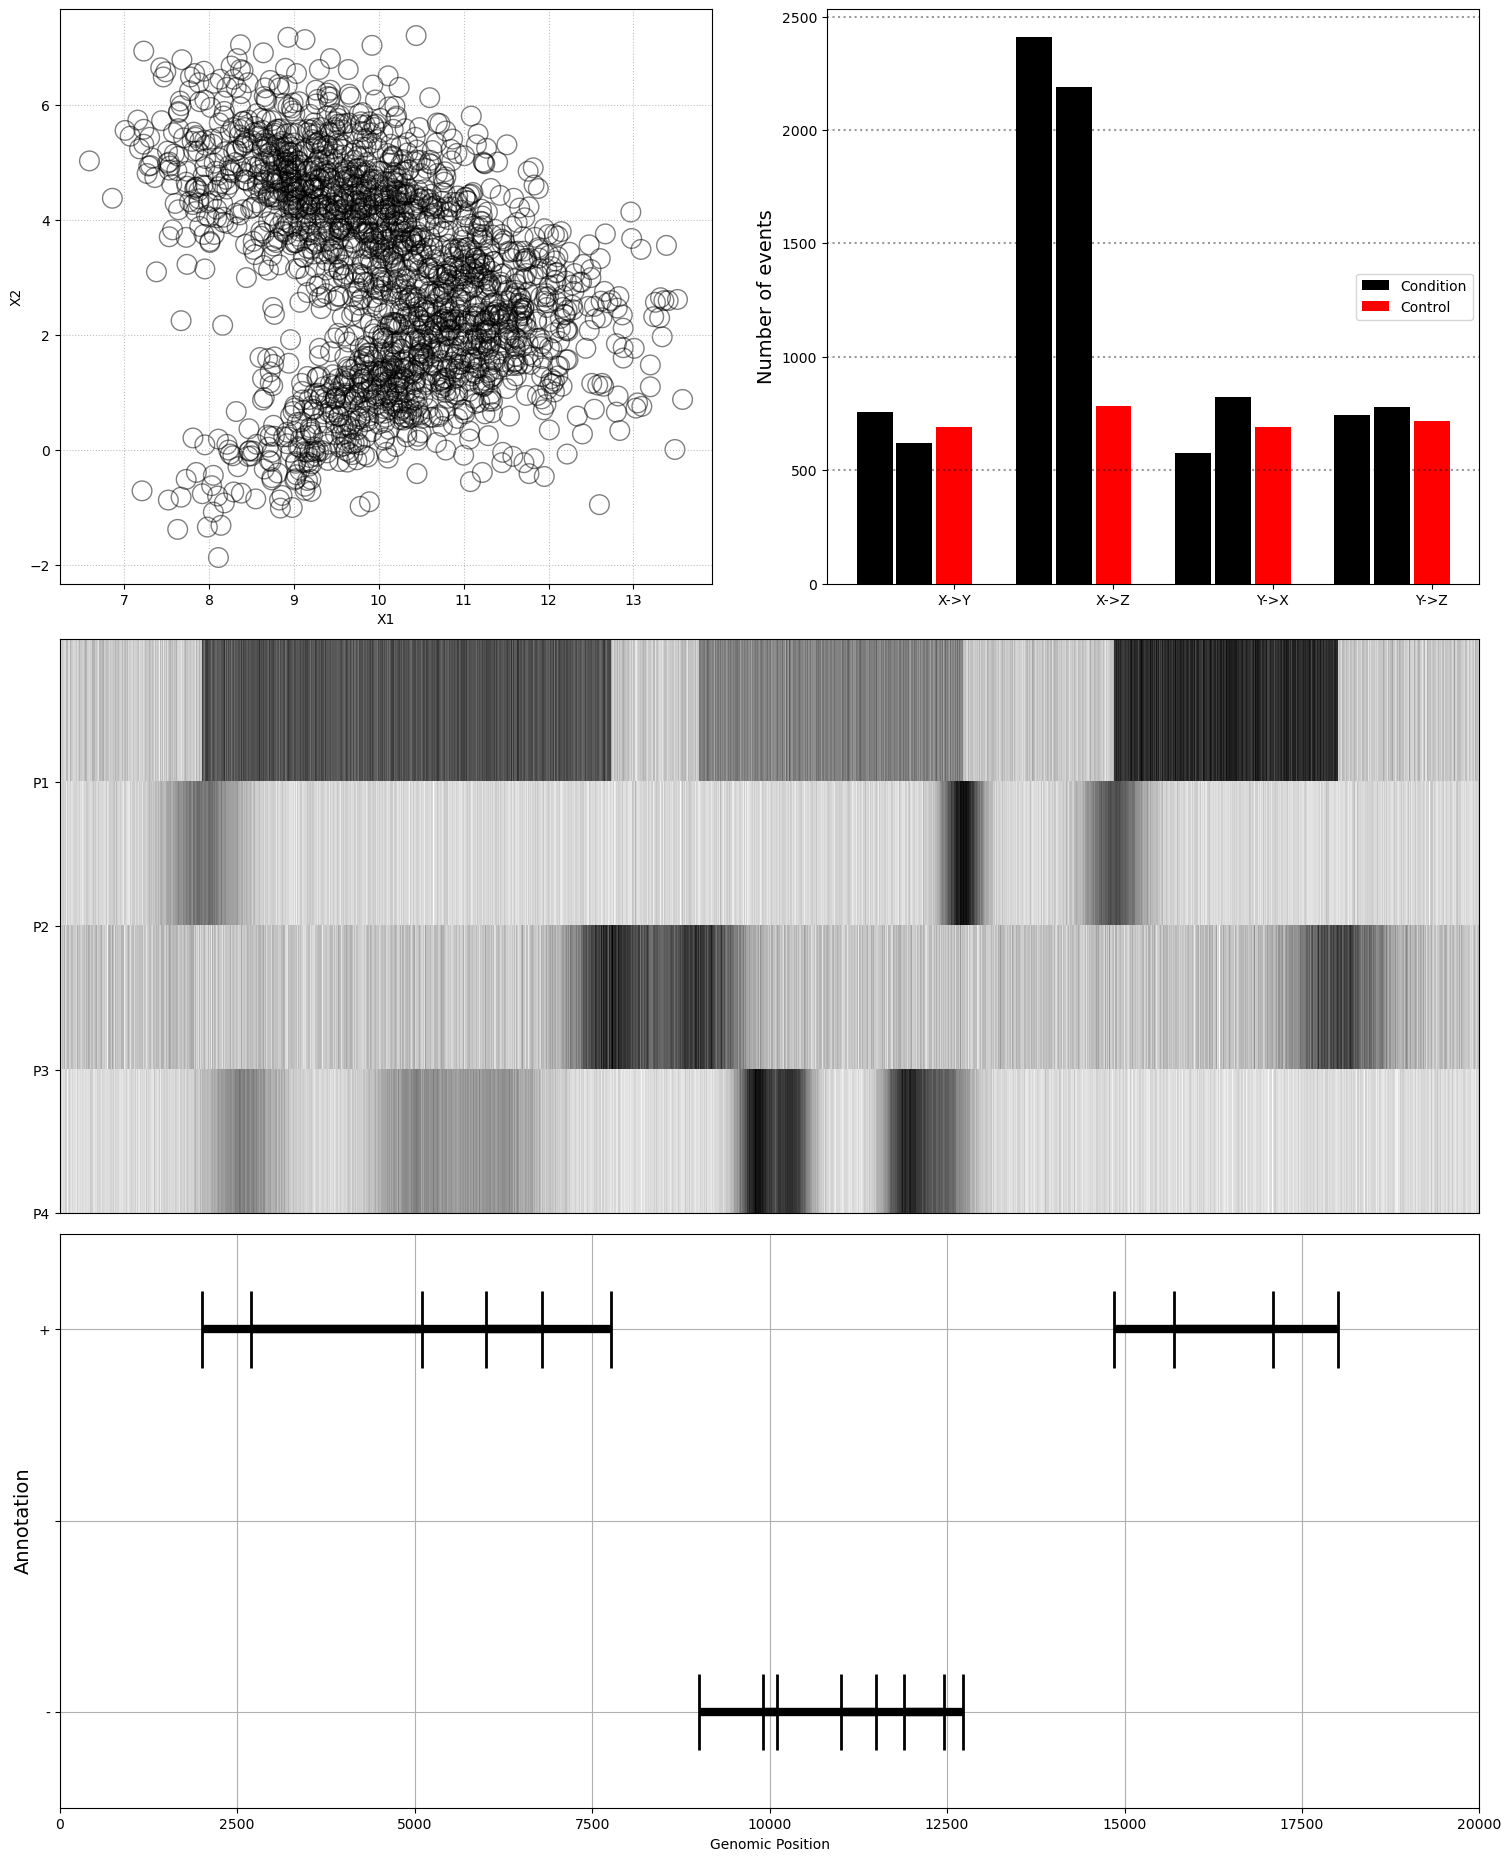

In [16]:
number_events =  np.arange(4)

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15, 30)
gs = fig.add_gridspec(5, 2)



ax1 = fig.add_subplot(gs[0, 0])  
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2 , :])


###############################################################################################################################

#scatter plot
ax1.scatter(datasheet_scatter["x1"], datasheet_scatter["x2"], facecolor='none',  edgecolor='black', s = 200, alpha = 0.5)
ax1.grid(alpha = 0.8 , linestyle='dotted')
ax1.set_ylabel ("X2")
ax1.set_xlabel ("X1")


###############################################################################################################################

# Bar plot

bar_width = 0.2
spacing = 0.2


x = np.arange(len(datasheet_bar["Unnamed: 0"])) * (bar_width + spacing * 3)  #< this is to mantain the spacing between the bars, One of the hardest part for this plot

ax2.bar(x - bar_width, datasheet_bar["condition_a_sample_1"], width=0.18, color="black", label='Condition')
ax2.bar(x, datasheet_bar["condition_a_sample_2"], width=0.18, color="black")
ax2.bar(x + bar_width, datasheet_bar["control"], width=0.18, color="red", label='Control')


ax2.set_ylabel('Number of events', fontsize = 14)
ax2.set_xticks(x + bar_width)  # Centering x-ticks on the grouped bars
ax2.set_xticklabels(datasheet_bar["Unnamed: 0"])

ax2.legend()

###############################################################################################################################
y_axis_values = [500, 1000, 1500, 2000, 2500]

for value in y_axis_values:
    ax2.axhline(y=value, color='black', linestyle='dotted', alpha=0.4)
###############################################################################################################################

#Heat map
# copy pasted from the above code with some changes.

im = ax3.imshow(combined_heatmap_data, aspect='auto', cmap='gray_r', interpolation='none')
ax3.set_yticks([0.5 + i for i in range(len(heatmap_data))])
ax3.set_yticklabels([f'P{i+1}' for i in range(len(heatmap_data))])
ax3.set_xticks([])

###############################################################################################################################
#annotation 

ax4.set_xlim(0, 20000)
ax4.set_ylim(-1.5, 1.5) 
ax4.set_yticks([-1, 0, 1]) 
ax4.set_yticklabels(['-', ' ', '+'] )  


plus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "+"].iterrows()]
minus_annotations = [(row["start"], row["stop"]) for _, row in datasheet_annotations[datasheet_annotations["strand"] == "-"].iterrows()]



for start, end in plus_annotations:
    ax4.plot([start, end], [1, 1], color='black', lw=6, solid_capstyle='butt')
    ax4.plot([start, start], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')
    ax4.plot([end, end], [0.8, 1.2], color='black', lw=2, solid_capstyle='butt')

for start, end in minus_annotations:
    ax4.plot([start, end], [-1, -1], color='black', lw=6, solid_capstyle='butt')
    ax4.plot([start, start], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')
    ax4.plot([end, end], [-1.2, -0.8], color='black', lw=2, solid_capstyle='butt')
    
ax4.set_ylabel('Annotation', fontsize = 14)
ax4.set_xlabel('Genomic Position')
ax4.grid()

###############################################################################################################################

for spine in ax2.spines.values(): # <- This for border.
    spine.set_visible(True)
plt.show()

**3. Visualization Exercise 3**

In [17]:
datasheet_line = pd.read_csv("10_project_data_lineplots.csv")
datasheet_line

,years,A,B,C,D,E,F
0,1970,13.0,19.0,20.5,3.0,4.8,5.1
1,1975,14.0,15.0,17.0,4.0,5.0,4.8
2,1980,17.0,11.0,12.0,6.0,4.7,5.5
3,1985,22.0,9.0,8.0,5.5,4.4,6.0
4,1990,21.0,12.5,10.0,5.1,5.2,7.3
5,1995,19.0,11.0,9.0,7.0,6.0,7.7
6,2000,20.0,10.0,8.0,6.3,5.1,6.6
7,2005,20.5,10.5,6.0,5.0,5.3,6.2
8,2010,20.3,9.8,5.5,7.5,5.2,5.7
9,2015,18.0,8.0,4.8,11.0,4.8,6.1


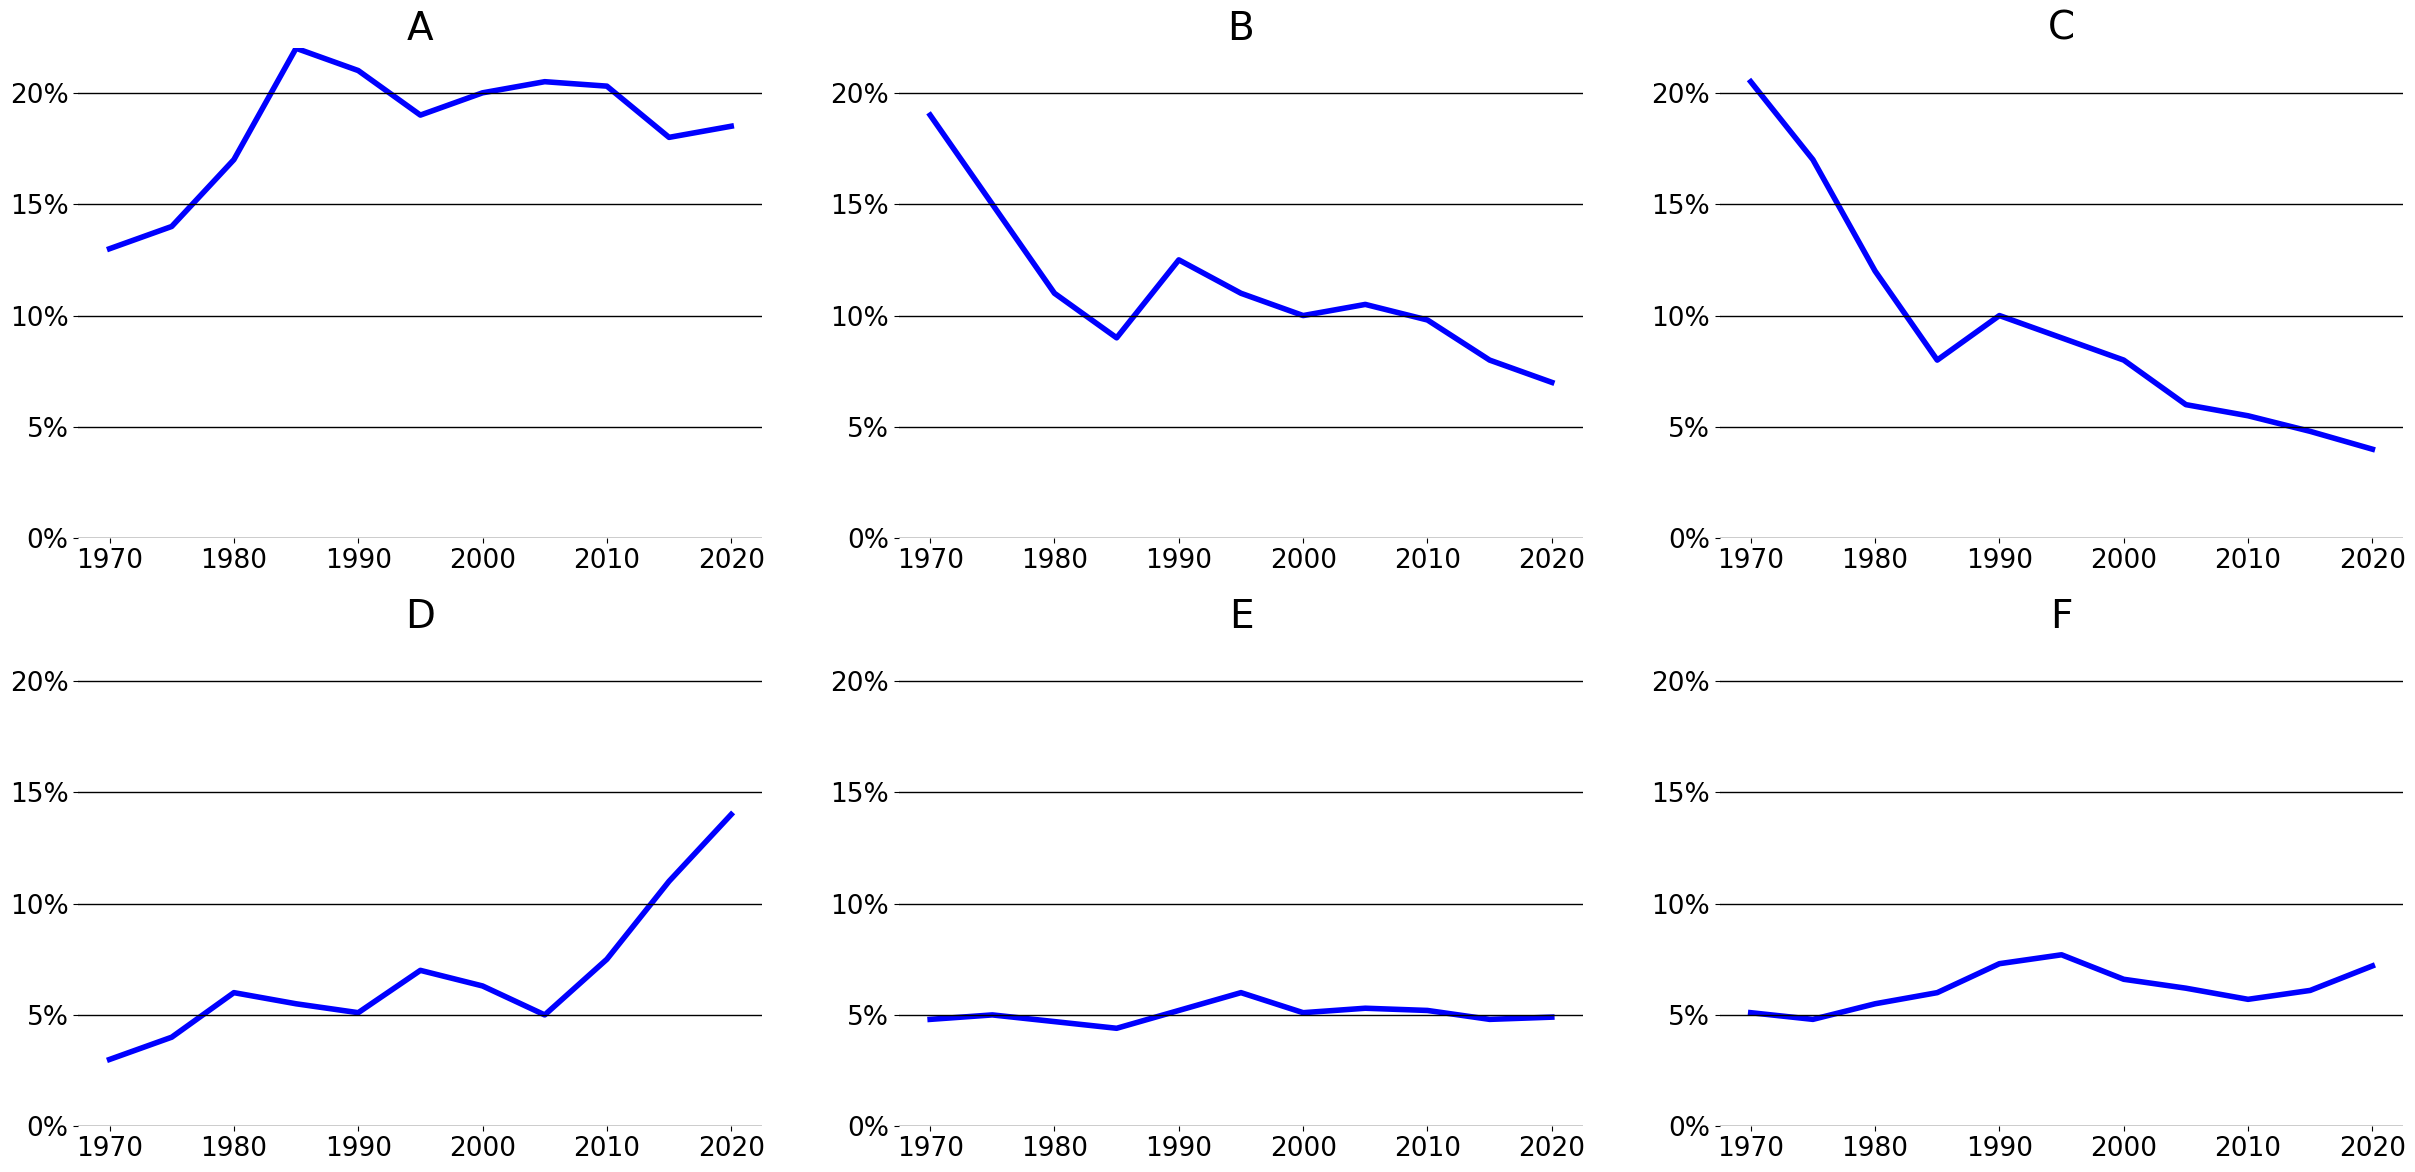

In [18]:

fig = plt.figure(figsize=(30, 14))
gs = fig.add_gridspec(2, 3)  


ax1 = fig.add_subplot(gs[0, 0])  
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[0, 2])  
ax4 = fig.add_subplot(gs[1, 0]) 
ax5 = fig.add_subplot(gs[1, 1])  
ax6 = fig.add_subplot(gs[1, 2])  
###############################################################################################################################

# plotting all the data one by one in diffrent subplots. 

ax1.plot (datasheet_line["years"], datasheet_line["A"], color ="blue" , linewidth=4)
ax1.set_title("A", fontsize=28)

ax2.plot (datasheet_line["years"], datasheet_line["B"], color ="blue", linewidth=4)
ax2.set_title("B" , fontsize=28)

ax3.plot (datasheet_line["years"], datasheet_line["C"], color ="blue", linewidth=4)
ax3.set_title("C", fontsize=28)

ax4.plot (datasheet_line["years"], datasheet_line["D"], color ="blue", linewidth=4)
ax4.set_title("D", fontsize=28)

ax5.plot (datasheet_line["years"], datasheet_line["E"], color ="blue", linewidth=4)
ax5.set_title("E",fontsize=28)


ax6.plot (datasheet_line["years"], datasheet_line["F"], color ="blue", linewidth=4)
ax6.set_title("F", fontsize=28)

###############################################################################################################################

def percent(x, pos):
    return f'{int(x)}%' 


# This code is to remove the borders from all plots. The "spines comand is always used for this purpose "'''
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(0, 22) #This part is very important. If we set the y lim to 20 some of our data will be lost. therfore I set it to "23")'''
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # for plotting horizontal lines
    for y_value in [0,5, 10, 15, 20]:  
        ax.axhline(y=y_value, color='black', linestyle='-', linewidth=1)
    
    ax.tick_params(axis='x', labelsize=19)  
    ax.tick_params(axis='y', labelsize=19)

  
    ax.set_yticks([0, 5, 10, 15, 20])
    ax.yaxis.set_major_formatter(FuncFormatter(percent))# Insteaf of using mapping to add "%". It can also be changed using "funcformat()"



In [19]:
file_path = "10_project_data_dna_sequences.txt"  
datasheet_seq = pd.read_csv(file_path, delimiter="\t")

print(datasheet_seq.head())

  GGGGCGCTTCTGGTAAATTTTTCTAGATGCATCGAGGGTGCCGAGGAACCGCTAAATTCAAAGAACTATATCTGCGCACACCAGGAGAGTCGAGCAGATAGATTAGGGATCTGCGCTGTGTGTGCGACGCGCACGGGGGCTCCTTGATGTATAGATTGCAGCTTTAACTAAAAATACTGAAGGAAAGGTCCAATTCAAAC
0  CTACAAACCGCGATAGCGAATTCGTTAAATACTGGCGTATTTCTAT...                                                                                                                                                      
1  CAGCCCAGCAGGAGATTCTAGACAAGAAACCAGCGCTGAGTGTCGC...                                                                                                                                                      
2  GGCGTTAAACACGAGGAGACCGCAGTCACTTGTTCAGTTACCACCT...                                                                                                                                                      
3  TGTGGATAACTATTAGACATCTTTAAGATCGTGAAGGGCGTTTACG...                                                                                                                                        

Hence the data sheet contains a long text instead of tables, it is useless to open it in  a **CSV file**. The best approach will be to open this fille 
using **with open**. The **with open()** statement is used to open and manage files in Python. I used this code to analyze DNA sequences by reading them from a text file and then counting the occurrences of each k-mer, which is a substring of length k, at every position within these sequences. Specifically, the code extracts and counts each k-mer for all possible starting positions within each sequence, storing these counts in a dictionary where each k-mer is mapped to an array representing the count of that k-mer at each position across all sequences. Finally, it visualizes the results by plotting the frequency of each k-mer across different positions, providing a graphical representation of how frequently each k-mer appears at various positions in the DNA sequences.

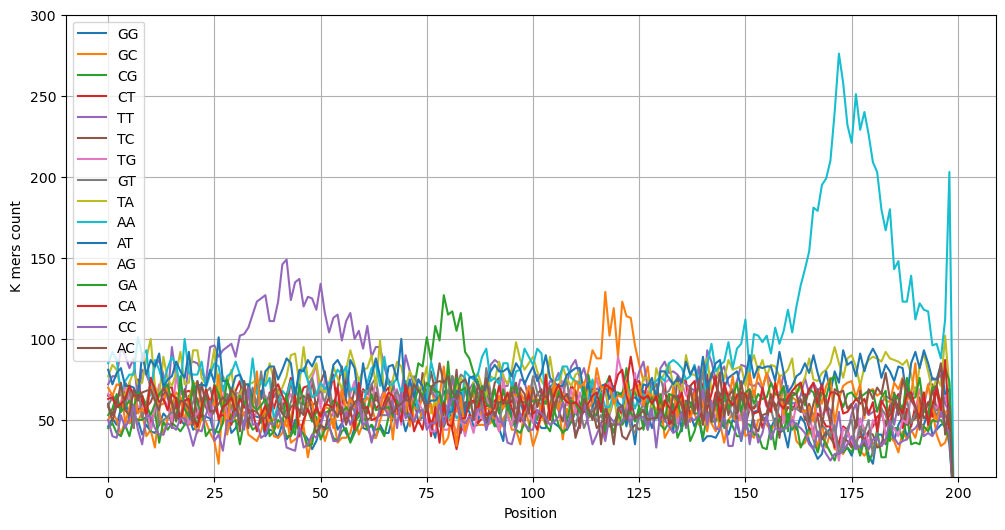

0.3274095058441162


In [20]:
file_path = "10_project_data_dna_sequences.txt"  
with open(file_path, 'r') as file:
    sequences = file.read().splitlines() # it is used to split a string into a list where each element is a line from the original string.
###############################################################################################################################

def kmers_creator(sequences, k):
    kcounts = {}  # This is an empty dictionary which will work as a placeholder to keep all the counts of k-mers.
    sequence_length = len(sequences[0])
    # For loop for forming k-mers
    for seq in sequences:
        for i in range(len(seq) - k + 1):
            kmer = seq[i:i + k] #Here the Kmers are divided according to the provided "K"
            if kmer not in kcounts:  # This is the most common technique to put counts of any character in the dictionary.
                kcounts[kmer] = np.zeros(sequence_length)
            kcounts[kmer][i] += 1
            #k_mers = pd.DataFrame(kcounts)  # I tried to put it in a data frame so we can see the values but my PC is not powerful enough.
    return kcounts

start_time = time.time() # I just used extra functions to check the performance. 
kcounts = kmers_creator(sequences, 2)


###############################################################################################################################

plt.figure(figsize=(12, 6))

for kmer, counts in kcounts.items():
    plt.plot(counts, label=kmer)
plt.ylim(15,300)
plt.xlabel('Position')
plt.ylabel('K mers count')
plt.legend()
plt.grid()
plt.show()
stop_time = time.time()

print ( stop_time - start_time)

**Thank You**


**END**